In [1]:
import os
import random
import math
from glob import glob
from PIL import Image

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/home/ml/.conda/envs/tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ml/.conda/envs/tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dataset_json = 'polyvore-dataset/train_no_dup.json'
dataset_images = 'polyvore-dataset/images/images/'

In [3]:
polyvore_dataset = pd.read_json(dataset_json)

### Dataset overview

In [4]:
polyvore_dataset.head()

,date,desc,image,items,likes,name,set_id,set_url,views
0,One month,A fashion look from January 2017 by beebeely-l...,http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,"[{'index': 1, 'name': 'mock neck embroidery su...",394,Casual,214181831,http://www.polyvore.com/casual/set?id=214181831,8743
1,Two years,A fashion look from April 2014 featuring destr...,http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,"[{'index': 1, 'name': 'nirvana distressed t-sh...",9,Being a Vans shoe model with Luke. Idk about t...,120161271,http://www.polyvore.com/being_vans_shoe_model_...,188
2,Two years,12.19.14,http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,"[{'index': 1, 'name': 'monki singlet', 'price'...",32,These Chanel bags is a bad habit .x,143656996,http://www.polyvore.com/these_chanel_bags_is_b...,562
3,One year,A fashion look from January 2016 by alyssaclai...,http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",88,Avenger/Supernatural prp,186627934,http://www.polyvore.com/avenger_supernatural_p...,2613
4,5 months,A fashion look from August 2016 by kate-goida ...,http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",3,Boho (39),206969379,http://www.polyvore.com/boho_39/set?id=206969379,62


The most interesting column for us is `items` where all items of the set are listed. Let's see how it looks like.

In [5]:
polyvore_dataset.iloc[0]['items']

[{'index': 1,
  'name': 'mock neck embroidery suede sweatshirt',
  'price': 24.0,
  'likes': 10,
  'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194508109',
  'categoryid': 4495},
 {'index': 2,
  'name': 'luxe double zip hooded jacket',
  'price': 150.0,
  'likes': 2250,
  'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188778349',
  'categoryid': 25},
 {'index': 3,
  'name': 'citizens humanity high rise rocket hem jean',
  'price': 248.0,
  'likes': 2437,
  'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188977857',
  'categoryid': 27},
 {'index': 4,
  'name': 'suede tie short boots',
  'price': 37.0,
  'likes': 2,
  'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194942557',
  'categoryid': 261},
 {'index': 5,
  'name': 'cloth travel school backpack',
  'price': 22.0,
  'likes': 2,
  'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194941874',
  'categoryid': 259},

### Listing images and removing duplicates
Every item could be found in multiple sets so we are using image url (hoping that they'are unique) to remove duplicates. You can choose other category/categories by including them in `categories` list, 3 is ID of dresses, you can check IDs for other categories in `category_id.txt` file.

In [6]:
def get_img_path(dataset, set_id, item):
    """Returns path for item image based on dasetpath, set_id and item.
    
    Args:
        dataset (str): path to dataset images
        set_id (int): set id
        item (str): item json
    Returns
        str: path to item image

    """
    filename = str(item['index']) + '.jpg'
    path = os.path.join(dataset, set_id, filename)         
    return path

categories = [3, 4, 5]
files = []
img_urls = []
for index, row in polyvore_dataset.iterrows():
    set_id = str(row['set_id'])
    for item in row['items']:
        if item['categoryid'] in categories:
            if item['image'] not in img_urls:  # removing duplicates
                files.append(get_img_path(dataset_images, set_id, item))
                img_urls.append(item['image'])
            
print('Items found:', len(files))

Items found: 3341


### Images overview
Displaying `n` random photos from choosen directory.

/home/ml/polyvore/polyvore-dataset/images/images/208751862/1.jpg
/home/ml/polyvore/polyvore-dataset/images/images/211208342/2.jpg
/home/ml/polyvore/polyvore-dataset/images/images/216804005/1.jpg
/home/ml/polyvore/polyvore-dataset/images/images/213835172/1.jpg
/home/ml/polyvore/polyvore-dataset/images/images/193813650/1.jpg
/home/ml/polyvore/polyvore-dataset/images/images/211258839/1.jpg
/home/ml/polyvore/polyvore-dataset/images/images/197060986/1.jpg
/home/ml/polyvore/polyvore-dataset/images/images/214951339/5.jpg
/home/ml/polyvore/polyvore-dataset/images/images/216116955/1.jpg
/home/ml/polyvore/polyvore-dataset/images/images/135174174/1.jpg


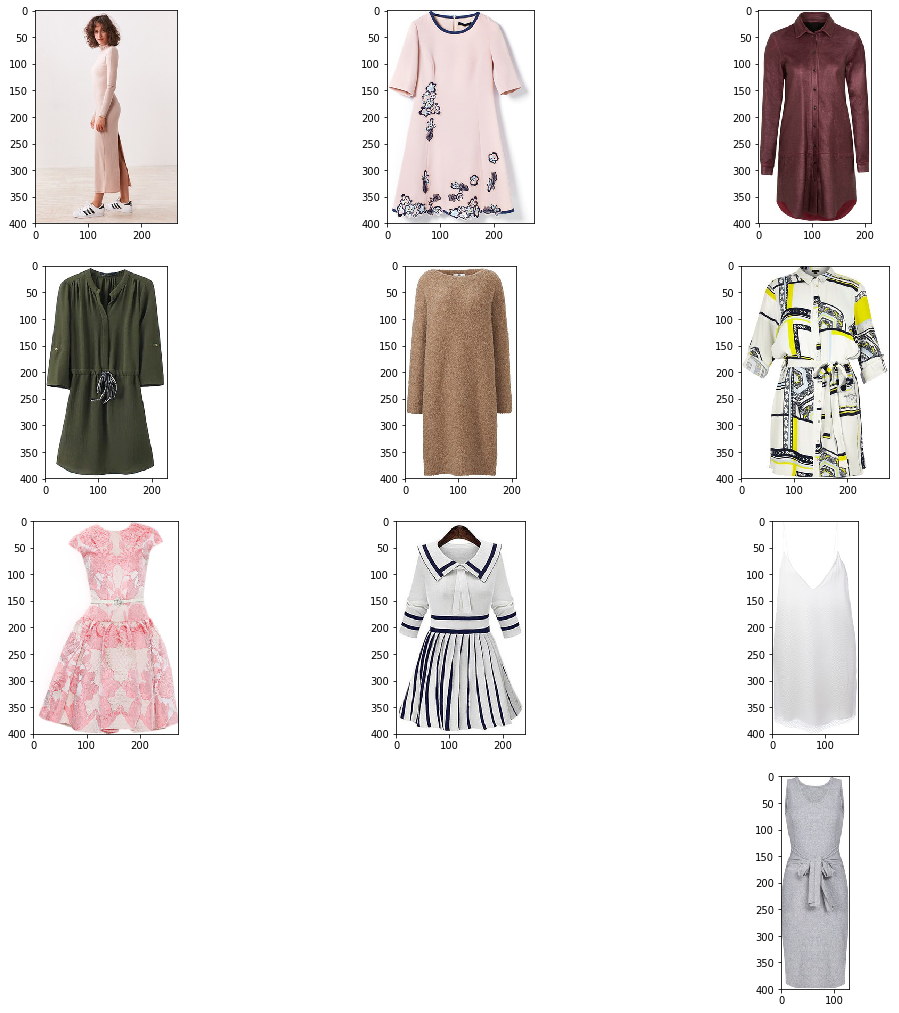

In [7]:
n = 10
fig=plt.figure(figsize=(18, 18))
for i, img in enumerate(random.sample(files, n)):
    print(img)
    im = mpimg.imread(img)
    plt.subplot(str(math.ceil(n/3))+'3'+str(i))
    plt.imshow(im)

### Distribution of "names"
Every item has `name` field which contains some "maybe useful" key words. Now we create histogram of k most frequent words in dataset and chosen category.

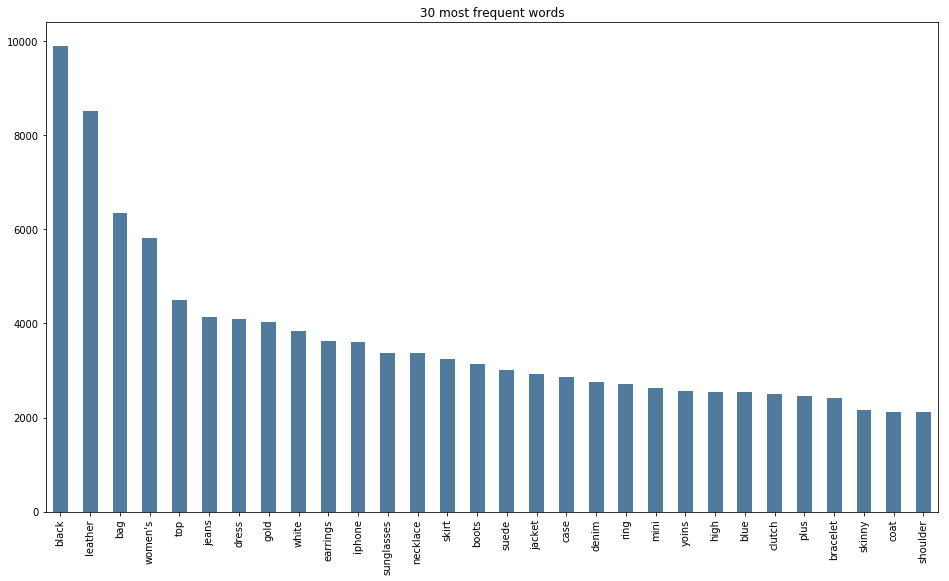

In [8]:
k=30
name_words = []
category_name_words = []
for index, row in polyvore_dataset.iterrows():
    for item in row['items']:
        item_name_words = item['name'].split()
        name_words.extend(item_name_words)
        if item['categoryid'] in categories:
            category_name_words.extend(item_name_words)

name_words = pd.Series(name_words)
top_k_words = pd.value_counts(name_words)[:k]
top_k_words.plot(kind='bar', figsize=(16, 9), color='xkcd:stormy blue',
                title=str(k) + ' most frequent words')

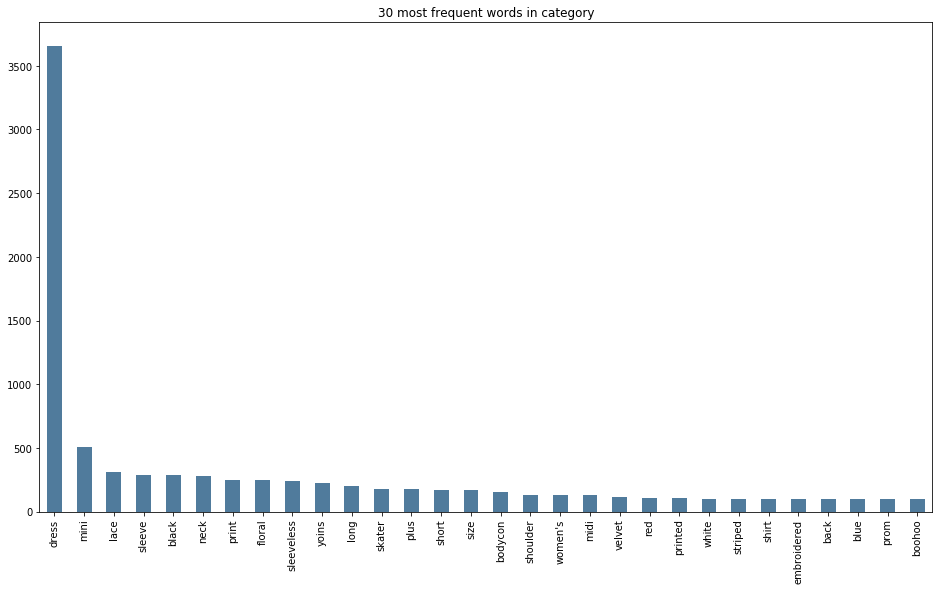

In [9]:
category_name_words = pd.Series(category_name_words)
top_k_category_name_words = pd.value_counts(category_name_words)[:k]
top_k_category_name_words.plot(kind='bar', figsize=(16, 9), color='xkcd:stormy blue',
                title=str(k) + ' most frequent words in category')

### Saving paths to images

In [11]:
import csv

with open('dresses.txt', 'w') as item_list:
    for file in files:
        item_list.write(file + '\n')